<a href="https://colab.research.google.com/github/grbarbosa3/Matplotlib_basics/blob/master/Matplotlib_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matplotlib

## Scatter plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH ="https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/housing.csv"

df = pd.read_csv(DATA_PATH)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


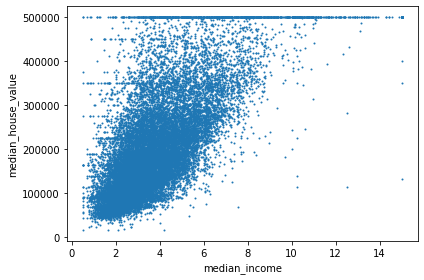

In [ ]:
fig, ax = plt.subplots()

df.plot.scatter(x='median_income',y='median_house_value',ax=ax, s=1)

fig.tight_layout()

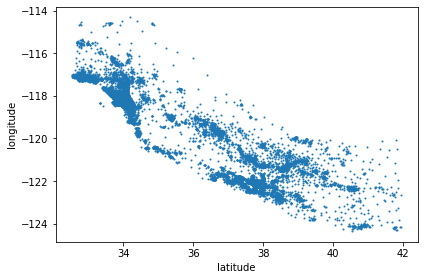

In [ ]:
fig, ax = plt.subplots()

df.plot.scatter(x='latitude', y='longitude', ax = ax,s = 1)

fig.tight_layout()

### Regressão linear em um scatter plot

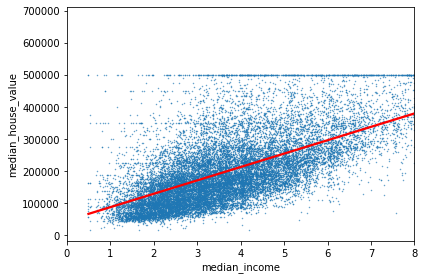

In [ ]:
# importar o seaborn
import seaborn as sns

# plotar scatter plot e regressão linear
fig, ax = plt.subplots()
ax.set_xlim(right=8)
sns.regplot('median_income', 'median_house_value', scatter_kws={"s": 0.2},
            line_kws={"color": "red"}, data=df, ax=ax)

fig.tight_layout()

## Boxplot

In [ ]:
df_bp = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv")

df_bp.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


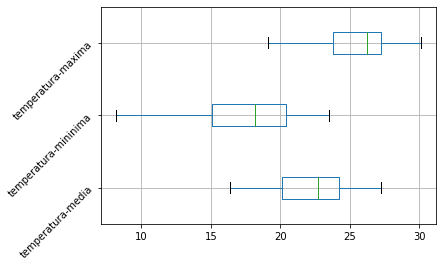

In [ ]:
fig, ax = plt.subplots()

df_bp.boxplot(['temperatura-media', 'temperatura-mininima', 'temperatura-maxima'],rot= 45, ax= ax, vert=False)

plt.show()

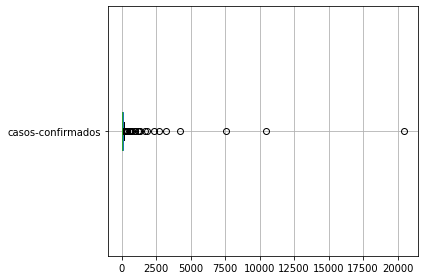

In [ ]:
fig, ax = plt.subplots()

df_bp.boxplot('casos-confirmados', ax = ax, vert=False)
fig.tight_layout()

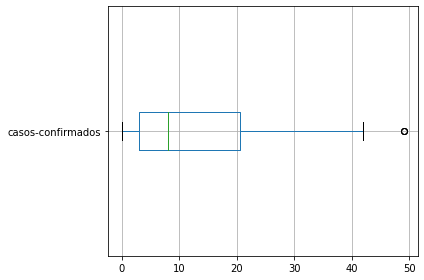

In [ ]:
fig, ax = plt.subplots()

df_bp.loc[df_bp['casos-confirmados'] < 50].boxplot('casos-confirmados', ax = ax, vert=False)
fig.tight_layout()

## Waffle

necessário importar a biblioteca *pywaffle*!

In [ ]:
# Instalando a Pywaffle

!pip install pywaffle -q

     |████████████████████████████████| 532kB 8.5MB/s 


In [ ]:
from pywaffle import Waffle

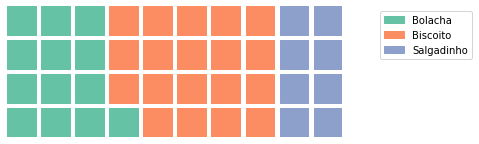

In [ ]:
fig = plt.figure(
                  FigureClass=Waffle,
                  rows=4,
                  columns=10,
                  values= {
                            'Bolacha':33,
                            'Biscoito':48,
                            'Salgadinho':19},
                  
                  legend={ 'loc':'upper left',
                          'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

### Customizando seus gráficos de waffle

O `pywaffle` é altamente customizado e aceita os ícones da [Font Awesome](http://fontawesome.io/).

Vamos ver como customizar os ícones da biblioteca para representar as estatísticas de ocorrências e acidentes com aviões no Brasil. Para isso, vou importar a [base de dados do Centro de Prevenção e Investigação de Acidentes Aeronáuticos](http://www2.fab.mil.br/cenipa/index.php/estatisticas).

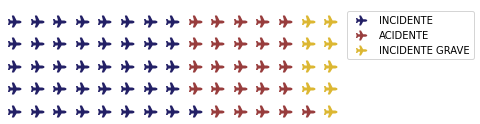

In [ ]:
# importar dados do CENIPA
df_aero = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/ocorrencias_aviacao.csv")

# extrair value counts da variavel ocorrencia_classificacao
data = df_aero.ocorrencia_classificacao.value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#232066", "#983D3D", "#DCB732"),
                values=data, icons='plane', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

Na figura acima, eu selecionei o ícone `plane`, que é apenas um entre inúmeros outros disponíveis.

Em outro exemplo, suponha que você quer representar por *waffle chart* a quantidade de homens e mulheres que estão matriculados em um determinado curso de ingles. Repare que eu vou usar o ícone `child`.

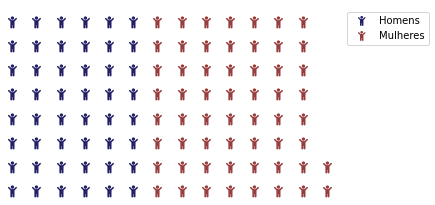

In [ ]:
# plotar homens e mulheres na sala de aula
fig = plt.figure(
    FigureClass=Waffle, 
    rows=8, 
    values={'Homens': 48, 'Mulheres': 58}, 
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=12, 
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();

##WordCloud

In [ ]:
!pip install wordcloud -q

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df_wc = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_wc.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200524171540,2020-05-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,NaN,Excellent location. Close to all major attract...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$0.00,7,180,7,7,1125,1125,7.0,1125.0,3 months ago,t,23,53,83,335,2020-05-25,251,23,2010-07-15,2020-04-06,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,2.09
1,21280,https://www.airbnb.com/rooms/21280,20200524171540,2020-05-25,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,NaN,The new metro station is just a few steps away...,"This is an older ""Art Deco"" style building, so...",Someone will be there at check in and check ou...,This is a booking agreement for rental of a tw...,NaN,NaN,https://a0.muscache.com/im/pictures/60851312/b...,NaN,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,...,$0.00,5,30,5,5,30,30,5.0,30.0,3 months ago,t,30,60,90,90,2020-05-25,94,6,2014-02-14,2020-03-22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200524171540,2020-05-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renov

In [ ]:
print("Valores ausentes de Summary: ", df_wc.summary.isnull().sum())

summary = df_wc.dropna(subset=['summary'],axis=0)['summary']

Valores ausentes de Summary:  2577


In [ ]:
all_summary = " ".join(s for s in summary)

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 10003725


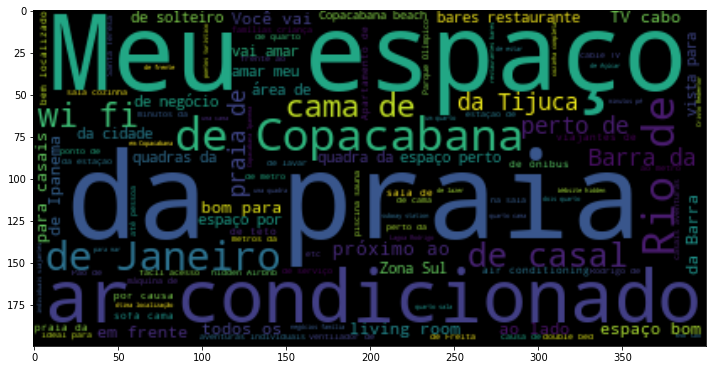

In [ ]:
#vamos criar uma lista de stopwords(Palavras que nao devem ser inclusas. ex: "Não","A","O","mas")

stopwords = set(STOPWORDS)

# Gerar uma WordCloud

wordcloud = WordCloud(stopwords=stopwords,
                       background_color='black').generate(all_summary)


#Mostrar a imagem final

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

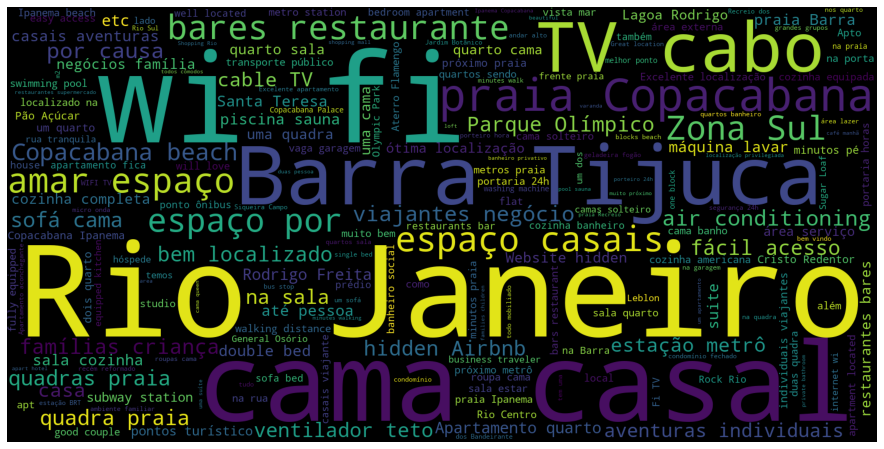

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["da","meu",'de','vai','bom','em','ao','os','você','para','living','perto','ar','condicionado'])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud2.png",)